In [2]:
import numpy as np
import pandas as pd

# Load data

Download data from this [link](http://airnow.tehran.ir/home/AQIArchive.aspx).

In [3]:
# Read downloaded excel file
xl_file = pd.ExcelFile('report.xlsx')

# Read all sheets as Pandas DataFrame
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}

# Read 'all stations' sheet and take a look at it
df = dfs['کل ایستگاه ها'].copy()
df.head()

,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.1,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.2,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.3,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.4,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.5,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.6,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.7,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.8,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.9,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.10,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.11,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.12,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.13,وضعیت آلودگی هوا به لحاظ آلاینده و به تفکیک روز.14
0,ایستگاه,تاریخ,CO,O3,NO2,SO2,PM10,PM2.5,AQI,پاک,سالم,ناسالم برای گروه حساس,ناسالم,بسیار ناسالم,خطرناک
1,کل ایستگاه ها,1387/01/01,53,45,25,38,90,NaN,90,NaN,1,NaN,NaN,NaN,NaN
2,کل ایستگاه ها,1387/01/02,50,53,30,34,72,NaN,72,NaN,1,NaN,NaN,NaN,NaN
3,کل ایستگاه ها,1387/01/03,30,55,24,32,57,NaN,57,NaN,1,NaN,NaN,NaN,NaN
4,کل ایستگاه ها,1387/01/04,49,61,34,38,65,NaN,65,NaN,1,NaN,NaN,NaN,NaN


In [4]:
# Assign first row to column names
df.columns = df.iloc[0]
df.drop(0, inplace=True)

# Select first 3900 rows
df = df[: 3900]
df.head()

,ایستگاه,تاریخ,CO,O3,NO2,SO2,PM10,PM2.5,AQI,پاک,سالم,ناسالم برای گروه حساس,ناسالم,بسیار ناسالم,خطرناک
1,کل ایستگاه ها,1387/01/01,53,45,25,38,90,NaN,90,NaN,1,NaN,NaN,NaN,NaN
2,کل ایستگاه ها,1387/01/02,50,53,30,34,72,NaN,72,NaN,1,NaN,NaN,NaN,NaN
3,کل ایستگاه ها,1387/01/03,30,55,24,32,57,NaN,57,NaN,1,NaN,NaN,NaN,NaN
4,کل ایستگاه ها,1387/01/04,49,61,34,38,65,NaN,65,NaN,1,NaN,NaN,NaN,NaN
5,کل ایستگاه ها,1387/01/05,54,44,29,45,103,NaN,103,NaN,NaN,1,NaN,NaN,NaN


In [5]:
# Drop unrelated columns
df = df[df.columns[2: 9]]

# Change dtypes of all remaining columns to numeric 
df = df.apply(pd.to_numeric, axis=1)

# Drop all rows with at least one NaN element
df.dropna(inplace=True)
df.head()

,CO,O3,NO2,SO2,PM10,PM2.5,AQI
921,70.0,57.0,29.0,36.0,57.0,24.0,70.0
922,78.0,40.0,27.0,36.0,60.0,30.0,78.0
923,42.0,30.0,24.0,34.0,77.0,32.0,77.0
924,45.0,51.0,22.0,35.0,52.0,55.0,55.0
925,55.0,44.0,27.0,33.0,55.0,63.0,63.0


In [6]:
# Let's take a look at statistics of data
df.describe()

,CO,O3,NO2,SO2,PM10,PM2.5,AQI
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,38.553644,36.683873,61.658907,24.626518,62.463563,93.050270,93.715587
std,10.957693,16.898166,13.630535,9.331839,18.964317,26.345516,26.472492
min,13.000000,7.000000,18.000000,3.000000,14.000000,24.000000,30.000000
25%,31.000000,24.000000,52.000000,19.000000,52.000000,75.000000,75.000000
50%,37.000000,34.000000,60.500000,24.000000,61.000000,90.000000,91.000000
75%,44.000000,45.000000,70.000000,31.000000,71.000000,109.000000,110.000000
max,119.000000,150.000000,110.000000,61.000000,278.000000,204.000000,278.000000


AQI is calculated based on this equation: max(CO, O3, NO2, SO2, PM10, PM2.5)
It seems that decisive factor for determining AQI is PM2.5, so let's check co-occurences of these two variables:

In [7]:
df[df['PM2.5'] == df['AQI']].shape[0] / df.shape[0]

0.9595141700404858

In %96 of rows, AQI is the same as PM2.5, so choose PM2.5 as target variable, and try to train a model that predicts PM2.5 for tomorrow based on all the information available from 14 days ago.

In [8]:
df.drop('AQI', axis=1, inplace=True)
df.head()

,CO,O3,NO2,SO2,PM10,PM2.5
921,70.0,57.0,29.0,36.0,57.0,24.0
922,78.0,40.0,27.0,36.0,60.0,30.0
923,42.0,30.0,24.0,34.0,77.0,32.0
924,45.0,51.0,22.0,35.0,52.0,55.0
925,55.0,44.0,27.0,33.0,55.0,63.0


In [9]:
data = df.values

# Make temporal data out of available data

In [13]:
# Define a function that generates temporal data samples,
# and standardizes data.


def split_data(data, lookback, delay):
    n_absolute_samples = len(data)
    n_features = data.shape[-1]
    
    start_indices = np.arange(n_absolute_samples - delay - lookback)
    end_indices = start_indices + lookback
    target_indices = end_indices + delay
    
    n_temporal_samples = start_indices.shape[0]
    
    data_x = np.zeros((n_temporal_samples, lookback, n_features))
    data_target = np.zeros(n_temporal_samples)
    
    for i in range(n_temporal_samples):
        data_x[i] = [sample for sample in data[start_indices[i]: end_indices[i]]]
        data_target[i] = data[target_indices[i]][-1]
    
    # Calculate feature-wise means and stds
    mean = data_x.reshape(-1, data_x.shape[-1]).mean(axis=0)
    std = data_x.reshape(-1, data_x.shape[-1]).std(axis=0)
    
    x_train = (data_x - mean) / std
    y_train = (data_target - mean[-1]) / std[-1]
    
    print('input data shape: ', x_train.shape)
    return x_train, y_train

We will predict PM2.5 at 't+1' based on information from '[t-14, t]':

In [14]:
lookback = 14
delay = 1

x_train, y_train = split_data(data, lookback, delay)

input data shape:  (2949, 14, 6)


# Baseline Non-Machine-learning Estimator

Define a baseline predictor for performance evaluation. We could define 'mean' or 'median' of data as baseline estimator, but we will choose a harder baseline to beat: **predict PM2.5 at 't' as PM2.5 at 't+1'**

We choose 'MAE' as loss function.

Let's evaluate this baseline estimator on data:

In [15]:
# Define and evaluate baseline predictor
# Baseline predictor: predict PM2.5 at 't' as PM2.5 at 't+1'

batch_maes = []
for sample, target in zip(x_train, y_train):
    pred = sample[-1, -1]
    mae = np.mean(np.abs(pred - target))
    batch_maes.append(mae)
print('Baseline error: ', np.mean(batch_maes))

Baseline error:  0.7210738964676922


# Baseline Machine-Learning Estimator

Train and test a simple 2-layer MLP:

In [16]:
# Test a baseline machine learning approach

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback, x_train.shape[-1])))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 84)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2720      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train on 60% of data, and validate on remaining 40% .

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(x_train, y_train, batch_size=32, epochs=100, shuffle=True, validation_split=0.4)

Train on 1769 samples, validate on 1180 samples
Epoch 1/100
1769/1769 [==============================] - 1s 291us/step - loss: 0.7990 - val_loss: 0.7047
Epoch 2/100
1769/1769 [==============================] - 0s 43us/step - loss: 0.6895 - val_loss: 0.6863
Epoch 3/100
1769/1769 [==============================] - 0s 39us/step - loss: 0.6634 - val_loss: 0.6862
Epoch 4/100
1769/1769 [==============================] - 0s 42us/step - loss: 0.6419 - val_loss: 0.6856
Epoch 5/100
1769/1769 [==============================] - 0s 44us/step - loss: 0.6272 - val_loss: 0.6643
Epoch 6/100
1769/1769 [==============================] - 0s 43us/step - loss: 0.6174 - val_loss: 0.6746
Epoch 7/100
1769/1769 [==============================] - 0s 42us/step - loss: 0.6100 - val_loss: 0.6739
Epoch 8/100
1769/1769 [==============================] - 0s 43us/step - loss: 0.5975 - val_loss: 0.6708
Epoch 9/100
1769/1769 [==============================] - 0s 43us/step - loss: 0.5901 - val_loss: 0.6784
Epoch 10/100
17

1769/1769 [==============================] - 0s 41us/step - loss: 0.3567 - val_loss: 0.8112
Epoch 79/100
1769/1769 [==============================] - 0s 48us/step - loss: 0.3545 - val_loss: 0.8368
Epoch 80/100
1769/1769 [==============================] - 0s 46us/step - loss: 0.3514 - val_loss: 0.8712
Epoch 81/100
1769/1769 [==============================] - 0s 39us/step - loss: 0.3497 - val_loss: 0.8468
Epoch 82/100
1769/1769 [==============================] - 0s 39us/step - loss: 0.3495 - val_loss: 0.8388
Epoch 83/100
1769/1769 [==============================] - 0s 45us/step - loss: 0.3478 - val_loss: 0.8431
Epoch 84/100
1769/1769 [==============================] - 0s 47us/step - loss: 0.3460 - val_loss: 0.8695
Epoch 85/100
1769/1769 [==============================] - 0s 42us/step - loss: 0.3431 - val_loss: 0.8564
Epoch 86/100
1769/1769 [==============================] - 0s 38us/step - loss: 0.3438 - val_loss: 0.8788
Epoch 87/100
1769/1769 [==============================] - 0s 38us/st

Define a function for loss visualization:

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss(history):
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    ax.plot(history.history['loss'], label='Training loss')
    ax.plot(history.history['val_loss'], label='Validation loss')
    ax.legend()
    ax.set_xlabel('# epoch')
    ax.set_ylabel('MAE')
    ax.set_title('MAE on train and validation data')
    return fig

Now, let's visualize loss value during training:

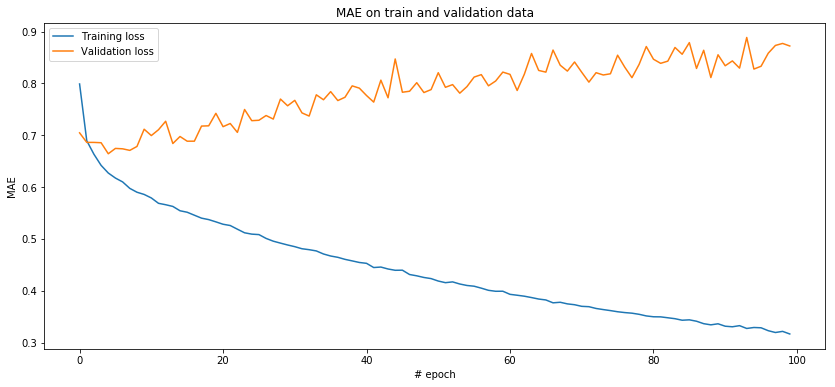

In [22]:
plot_loss(history)

This is terrible! Model is memorizing the training data instead of extracting useful and global meaningful features. This is because of the nature of the model: it can not understand temporal relationships within data samples.

Let's make a model that doesn't ignore temporal information: **RNN**

# GRU-Based RNN Model

In [23]:
# Train a simple GRU-based RNN model

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x_train.shape[-1]), dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 32)                3744      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Train on 60% of data, and validate on remaining 40% .

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(x_train, y_train, batch_size=32, epochs=100, shuffle=True, validation_split=0.4)

Train on 1769 samples, validate on 1180 samples
Epoch 1/100
1769/1769 [==============================] - 2s 901us/step - loss: 0.6884 - val_loss: 0.6163
Epoch 2/100
1769/1769 [==============================] - 1s 291us/step - loss: 0.6697 - val_loss: 0.6206
Epoch 3/100
1769/1769 [==============================] - 1s 304us/step - loss: 0.6648 - val_loss: 0.6055
Epoch 4/100
1769/1769 [==============================] - 1s 289us/step - loss: 0.6679 - val_loss: 0.6130
Epoch 5/100
1769/1769 [==============================] - 0s 267us/step - loss: 0.6529 - val_loss: 0.6094
Epoch 6/100
1769/1769 [==============================] - 0s 268us/step - loss: 0.6579 - val_loss: 0.6241
Epoch 7/100
1769/1769 [==============================] - 1s 291us/step - loss: 0.6617 - val_loss: 0.6171
Epoch 8/100
1769/1769 [==============================] - 1s 286us/step - loss: 0.6504 - val_loss: 0.6100
Epoch 9/100
1769/1769 [==============================] - 0s 279us/step - loss: 0.6575 - val_loss: 0.5988
Epoch 1

Epoch 78/100
1769/1769 [==============================] - 1s 283us/step - loss: 0.6107 - val_loss: 0.6074
Epoch 79/100
1769/1769 [==============================] - 0s 269us/step - loss: 0.6061 - val_loss: 0.6482
Epoch 80/100
1769/1769 [==============================] - 0s 277us/step - loss: 0.5965 - val_loss: 0.6146
Epoch 81/100
1769/1769 [==============================] - 0s 273us/step - loss: 0.6137 - val_loss: 0.6263
Epoch 82/100
1769/1769 [==============================] - 0s 269us/step - loss: 0.6043 - val_loss: 0.6040
Epoch 83/100
1769/1769 [==============================] - 1s 283us/step - loss: 0.6057 - val_loss: 0.6244
Epoch 84/100
1769/1769 [==============================] - 0s 269us/step - loss: 0.6052 - val_loss: 0.6255
Epoch 85/100
1769/1769 [==============================] - 1s 293us/step - loss: 0.6014 - val_loss: 0.6165
Epoch 86/100
1769/1769 [==============================] - 0s 272us/step - loss: 0.6031 - val_loss: 0.6155
Epoch 87/100
1769/1769 [======================

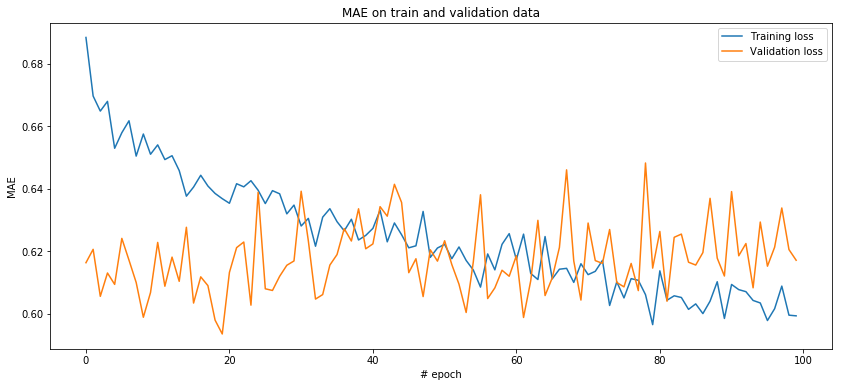

In [25]:
plot_loss(history)

That is about 0.13 below the baseline test loss, and 0.19 better than MLP baseline! Pretty good for a simple RNN.